In [4]:
import pandas as pd
import numpy as np

In [5]:
import os

dataset_path = './datasets'
students_dataset_path = os.path.join(dataset_path, 'student-mat.csv')
students_dataset = pd.read_csv(students_dataset_path, sep=';')

#link to dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [6]:
students_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
features_to_take = [
    "school", 
    "sex", 
    "age", 
    "address", 
    "famsize",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "higher",
    "internet",
    "romantic",
    "famrel",
    "goout",
    "Dalc",
    "Walc",
    "absences",
    "G3"
]
#let's reduce data set 
students_dataset_reduced = students_dataset[features_to_take]

In [8]:
students_dataset_reduced

,school,sex,age,address,famsize,Medu,Fedu,traveltime,studytime,failures,...,activities,higher,internet,romantic,famrel,goout,Dalc,Walc,absences,G3
0,GP,F,18,U,GT3,4,4,2,2,0,...,no,yes,no,no,4,4,1,1,6,6
1,GP,F,17,U,GT3,1,1,1,2,0,...,no,yes,yes,no,5,3,1,1,4,6
2,GP,F,15,U,LE3,1,1,1,2,3,...,no,yes,yes,no,4,2,2,3,10,10
3,GP,F,15,U,GT3,4,2,1,3,0,...,yes,yes,yes,yes,3,2,1,1,2,15
4,GP,F,16,U,GT3,3,3,1,2,0,...,no,yes,no,no,4,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,2,2,1,2,2,...,no,yes,no,no,5,4,4,5,11,9
391,MS,M,17,U,LE3,3,1,2,1,0,...,no,yes,yes,no,2,5,3,4,3,16
392,MS,M,21,R,GT3,1,1,1,1,3,...,no,yes,no,no,5,3,3,3,3,7
393,MS,M,18,R,LE3,3,2,3,1,0,...,no,yes,yes,no,4,1,3,4,0,10


In [9]:
#keep on reducing, combining two columns into one 
paredu = students_dataset_reduced.apply(lambda row: (row.Medu + row.Fedu) / 2, axis=1)

In [10]:
paredu

0      4.0
1      1.0
2      1.0
3      3.0
4      3.0
      ... 
390    2.0
391    2.0
392    1.0
393    2.5
394    1.0
Length: 395, dtype: float64

In [11]:
students_dataset_reduced = students_dataset_reduced.assign(Paredu=paredu)

In [16]:
#the same combinig as obove but in one line
students_dataset_reduced = students_dataset_reduced.assign(
    alc = students_dataset_reduced.apply(lambda row: (row.Walc + row.Dalc) / 2, axis = 1)
)

In [17]:
students_dataset_reduced

,school,sex,age,address,famsize,Medu,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,goout,Dalc,Walc,absences,G3,Paredu,alc
0,GP,F,18,U,GT3,4,4,2,2,0,...,no,no,4,4,1,1,6,6,4.0,1.0
1,GP,F,17,U,GT3,1,1,1,2,0,...,yes,no,5,3,1,1,4,6,1.0,1.0
2,GP,F,15,U,LE3,1,1,1,2,3,...,yes,no,4,2,2,3,10,10,1.0,2.5
3,GP,F,15,U,GT3,4,2,1,3,0,...,yes,yes,3,2,1,1,2,15,3.0,1.0
4,GP,F,16,U,GT3,3,3,1,2,0,...,no,no,4,2,1,2,4,10,3.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,2,2,1,2,2,...,no,no,5,4,4,5,11,9,2.0,4.5
391,MS,M,17,U,LE3,3,1,2,1,0,...,yes,no,2,5,3,4,3,16,2.0,3.5
392,MS,M,21,R,GT3,1,1,1,1,3,...,no,no,5,3,3,3,3,7,1.0,3.0
393,MS,M,18,R,LE3,3,2,3,1,0,...,yes,no,4,1,3,4,0,10,2.5,3.5


In [38]:
students_dataset_reduced.drop(columns = ["Medu", "Fedu", "Dalc", "Walc"], inplace=True)

In [20]:
students_dataset_reduced.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Medu            int64
Fedu            int64
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
higher         object
internet       object
romantic       object
famrel          int64
goout           int64
Dalc            int64
Walc            int64
absences        int64
G3              int64
Paredu        float64
alc           float64
dtype: object

In [21]:
#now categorize data
students_dataset_reduced = pd.get_dummies(students_dataset_reduced, drop_first = True)

In [22]:
students_dataset_reduced

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,1,1,...,0,1,0,1,0,0,0,1,0,0
1,17,1,1,1,2,0,5,3,1,1,...,0,1,0,0,1,0,0,1,1,0
2,15,1,1,1,2,3,4,2,2,3,...,0,1,1,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,1,1,...,0,1,0,0,1,1,1,1,1,1
4,16,3,3,1,2,0,4,2,1,2,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,4,4,5,...,1,1,1,0,1,1,0,1,0,0
391,17,3,1,2,1,0,2,5,3,4,...,1,1,1,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,3,3,3,...,1,0,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,1,3,4,...,1,0,1,0,0,0,0,1,1,0


In [27]:
#standardasing data
#https://builtin.com/data-science/when-and-why-standardize-your-data
standard_paredu = (
    students_dataset_reduced.Paredu - students_dataset_reduced.Paredu.mean()) / students_dataset_reduced.Paredu.std()

In [28]:
standard_paredu

0      1.387635
1     -1.663102
2     -1.663102
3      0.370722
4      0.370722
         ...   
390   -0.646190
391   -0.646190
392   -1.663102
393   -0.137734
394   -1.663102
Name: Paredu, Length: 395, dtype: float64

In [29]:
print("MEAN: ", standard_paredu.mean())
print("STD: ", standard_paredu.std())

MEAN:  1.7032788681591009e-16
STD:  0.9999999999999989


In [61]:
#let's write a custom func to standardize data in column
def standardise_columns(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    target_col_name = f"{column_name}_standardised"
    standardised_column = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    kwargs = {target_col_name: standardised_column}
    return df.assign(**kwargs)

In [66]:
#list of columns to standardise
columns_to_standardise = [
    "age_standardised", 
    "traveltime_standardised", 
    "studytime_standardised", 
    "failures_standardised",
    "famrel_standardised",
    "goout_standardised",
    "absences_standardised",
    "Paredu_standardised",
    "alc_standardised"
]

In [67]:
for column in columns_to_standardise:
    students_dataset_reduced = standardise_columns(
        df=students_dataset_reduced,
        column_name=column
    )
    

In [80]:
#checking mean values
students_dataset_reduced.iloc[:, 21:].mean()

age_standardised           2.549859e-15
traveltime_standardised    2.234500e-16
studytime_standardised    -3.563956e-16
failures_standardised     -2.254174e-16
famrel_standardised       -1.101791e-16
goout_standardised        -3.618765e-18
absences_standardised      5.986772e-17
Paredu_standardised        1.703279e-16
alc_standardised           6.520804e-17
dtype: float64

In [81]:
students_dataset_reduced.iloc[:, 21:].var()

age_standardised           1.0
traveltime_standardised    1.0
studytime_standardised     1.0
failures_standardised      1.0
famrel_standardised        1.0
goout_standardised         1.0
absences_standardised      1.0
Paredu_standardised        1.0
alc_standardised           1.0
dtype: float64

In [43]:
students_dataset_reduced.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<AxesSubplot:>

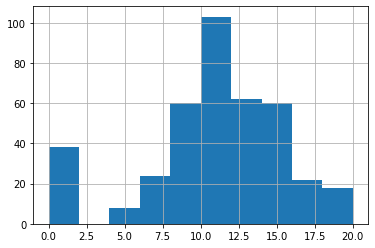

In [45]:
#close to normal distribution
students_dataset_reduced.G3.hist()

In [82]:
#let's create target column whch we want to predict. Test score above 10 : student passed
students_dataset_reduced = students_dataset_reduced.assign(target=(students_dataset_reduced.G3 > 10.0).astype(np.uint8))

In [83]:
students_dataset_reduced

,age,traveltime,studytime,failures,famrel,goout,absences,G3,Paredu,alc,...,age_standardised,traveltime_standardised,studytime_standardised,failures_standardised,famrel_standardised,goout_standardised,absences_standardised,Paredu_standardised,alc_standardised,target
0,18,2,2,0,4,4,6,6,4.0,1.0,...,1.021751,0.791247,-0.042232,-0.449374,0.062115,0.800464,0.036378,1.387635,-0.893046,0
1,17,1,2,0,5,3,4,6,1.0,1.0,...,0.238078,-0.642435,-0.042232,-0.449374,1.177367,-0.097784,-0.213525,-1.663102,-0.893046,0
2,15,1,2,3,4,2,10,10,1.0,2.5,...,-1.329268,-0.642435,-0.042232,3.584777,0.062115,-0.996032,0.536185,-1.663102,0.618754,0
3,15,1,3,0,3,2,2,15,3.0,1.0,...,-1.329268,-0.642435,1.149321,-0.449374,-1.053136,-0.996032,-0.463428,0.370722,-0.893046,1
4,16,1,2,0,4,2,4,10,3.0,1.5,...,-0.545595,-0.642435,-0.042232,-0.449374,0.062115,-0.996032,-0.213525,0.370722,-0.389113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,2,2,5,4,11,9,2.0,4.5,...,2.589096,-0.642435,-0.042232,2.240060,1.177367,0.800464,0.661137,-0.646190,2.634487,0
391,17,2,1,0,2,5,3,16,2.0,3.5,...,0.238078,0.791247,-1.233786,-0.449374,-2.168388,1.698712,-0.338477,-0.646190,1.626620,1
392,21,1,1,3,5,3,3,7,1.0,3.0,...,3.372769,-0.642435,-1.233786,3.584777,1.177367,-0.097784,-0.338477,-1.663102,1.122687,0
393,18,3,1,0,4,1,0,10,2.5,3.5,...,1.021751,2.224929,-1.233786,-0.449374,0.062115,-1.894280,-0.713332,-0.137734,1.626620,0


<AxesSubplot:>

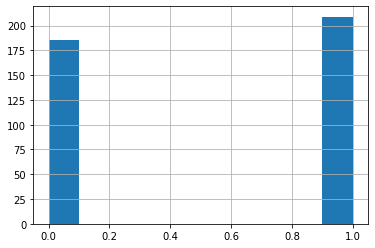

In [53]:
students_dataset_reduced.target.hist()

In [84]:
#choosing data to model
x_df = students_dataset_reduced.loc[: , 'school_MS': "alc_standardised"]
y_df = students_dataset_reduced.target

In [85]:
x_df

,school_MS,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes,age_standardised,traveltime_standardised,studytime_standardised,failures_standardised,famrel_standardised,goout_standardised,absences_standardised,Paredu_standardised,alc_standardised
0,0,0,1,0,1,0,0,0,1,0,0,1.021751,0.791247,-0.042232,-0.449374,0.062115,0.800464,0.036378,1.387635,-0.893046
1,0,0,1,0,0,1,0,0,1,1,0,0.238078,-0.642435,-0.042232,-0.449374,1.177367,-0.097784,-0.213525,-1.663102,-0.893046
2,0,0,1,1,1,0,1,0,1,1,0,-1.329268,-0.642435,-0.042232,3.584777,0.062115,-0.996032,0.536185,-1.663102,0.618754
3,0,0,1,0,0,1,1,1,1,1,1,-1.329268,-0.642435,1.149321,-0.449374,-1.053136,-0.996032,-0.463428,0.370722,-0.893046
4,0,0,1,0,0,1,1,0,1,0,0,-0.545595,-0.642435,-0.042232,-0.449374,0.062115,-0.996032,-0.213525,0.370722,-0.389113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,1,1,0,1,0,0,2.589096,-0.642435,-0.042232,2.240060,1.177367,0.800464,0.661137,-0.646190,2.634487
391,1,1,1,1,0,0,0,0,1,1,0,0.238078,0.791247,-1.233786,-0.449374,-2.168388,1.698712,-0.338477,-0.646190,1.626620
392,1,1,0,0,0,0,0,0,1,0,0,3.372769,-0.642435,-1.233786,3.584777,1.177367,-0.097784,-0.338477,-1.663102,1.122687
393,1,1,0,1,0,0,0,0,1,1,0,1.021751,2.224929,-1.233786,-0.449374,0.062115,-1.894280,-0.713332,-0.137734,1.626620


In [86]:
y_df

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    0
393    0
394    0
Name: target, Length: 395, dtype: uint8

In [87]:
X, y = x_df.values, y_df.values

In [90]:
print('X.shape', X.shape)
print('X.dtype', X.dtype)
print('y.shape', y.shape)
print('y.dtypee', y.dtype)

X.shape (395, 20)
X.dtype float64
y.shape (395,)
y.dtypee uint8


In [91]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
#https://en.wikipedia.org/wiki/Support-vector_machine
#https://en.wikipedia.org/wiki/F-score

In [92]:
kf = KFold(n_splits=15, shuffle=True)
test_sets = []
models = []
models_scores = []
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    f1 = f1_score(y_true=y_test, y_pred=predictions)
    accuracy = np.sum(y_test == predictions) / y_test.shape[0]
    print(f"F1: {f1}, accuracy: {accuracy}")
    models.append(clf)
    models_scores.append(f1)
    test_sets.append((X_test, y_test))

F1: 0.7058823529411764, accuracy: 0.6296296296296297
F1: 0.75, accuracy: 0.7037037037037037
F1: 0.7999999999999999, accuracy: 0.7407407407407407
F1: 0.5806451612903226, accuracy: 0.5185185185185185
F1: 0.6, accuracy: 0.5555555555555556
F1: 0.7567567567567567, accuracy: 0.6538461538461539
F1: 0.7272727272727272, accuracy: 0.6538461538461539
F1: 0.7096774193548386, accuracy: 0.6538461538461539
F1: 0.4799999999999999, accuracy: 0.5
F1: 0.46153846153846156, accuracy: 0.46153846153846156
F1: 0.6428571428571429, accuracy: 0.6153846153846154
F1: 0.7647058823529412, accuracy: 0.6923076923076923
F1: 0.7878787878787878, accuracy: 0.7307692307692307
F1: 0.6923076923076923, accuracy: 0.6923076923076923
F1: 0.6666666666666666, accuracy: 0.6538461538461539


In [93]:
example_model = models[6]
example_X, example_y = test_sets[6]

In [94]:
example_X[0]

array([ 0.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.        , -1.32926782, -0.64243471, -1.23378606, -0.44937373,
        0.06211528, -0.09778397, -0.46342827,  1.38763463,  0.11482026])

In [95]:
example_y[0]

1

In [96]:
example_model.predict([example_X[0]])

array([1], dtype=uint8)